<a href="https://colab.research.google.com/github/AntoninaRemizova/MMAD/blob/main/%D0%9C%D0%9C%D0%90%D0%94_%D0%9A%D0%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from scipy import stats
from scipy.stats import chi2_contingency
import math

url = "https://raw.githubusercontent.com/AntoninaRemizova/MMAD/main/dataset1.xlsx"
data = pd.read_excel(url)
data

,№,X1,X2,X3,X4,Y
0,1,8,1,15,6,282
1,2,7,18,0,19,181
2,3,3,5,15,2,60
3,4,16,12,14,2,454
4,5,12,6,1,10,283
...,...,...,...,...,...,...
145,146,8,6,9,4,54
146,147,10,2,9,1,71
147,148,17,9,2,9,67
148,149,2,18,18,14,131


# Описательная статистика

## Числовые значения

In [2]:
columns = ['X1', 'X2', 'X3', 'X4', 'Y']

results = pd.DataFrame(index=['Размер датасета',
                            'Среднее арифметическое',
                            'Среднее квадратическое',
                            'Среднее геометрическое',
                            'Медиана',
                            'Дисперсия',
                            'Стандартное отклонение',
                            'Размах вариации',
                            'Минимум',
                            'Максимум'])

for col in columns:
    stats_data = {
        'Размер датасета': len(data[col]),
        'Среднее арифметическое': np.mean(data[col]),
        'Среднее квадратическое': np.sqrt(np.mean(data[col]**2)),
        'Среднее геометрическое': stats.gmean(data[col]),
        'Медиана': np.median(data[col]),
        'Дисперсия': np.var(data[col]),
        'Стандартное отклонение': np.std(data[col]),
        'Размах вариации': np.ptp(data[col]),
        'Минимум': np.min(data[col]),
        'Максимум': np.max(data[col])
    }

    results[col] = stats_data.values()

results = results.round(3)

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.colheader_justify', 'center')

print("Описательная статистика".center(80))
print(results.to_string())

                            Описательная статистика                             
                          X1       X2       X3       X4         Y    
Размер датасета         150.000  150.000  150.000  150.000    150.000
Среднее арифметическое   10.233   10.620    9.987   10.013    211.733
Среднее квадратическое   11.610   12.120   11.655   11.467    266.702
Среднее геометрическое    0.000    0.000    0.000    0.000    160.354
Медиана                  10.000   11.000   10.000   10.000    135.500
Дисперсия                30.072   34.116   36.106   31.226  26298.769
Стандартное отклонение    5.484    5.841    6.009    5.588    162.169
Размах вариации          20.000   20.000   20.000   20.000    619.000
Минимум                   0.000    0.000    0.000    0.000     39.000
Максимум                 20.000   20.000   20.000   20.000    658.000


## Boxplots

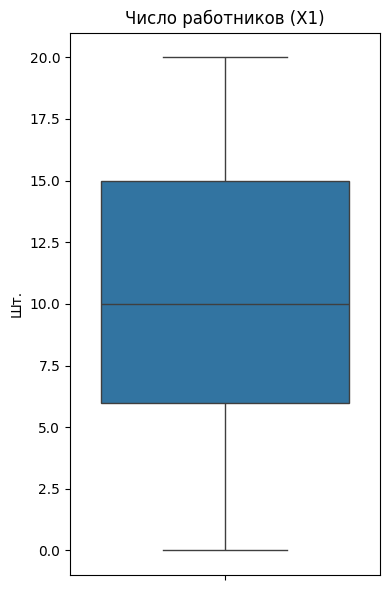

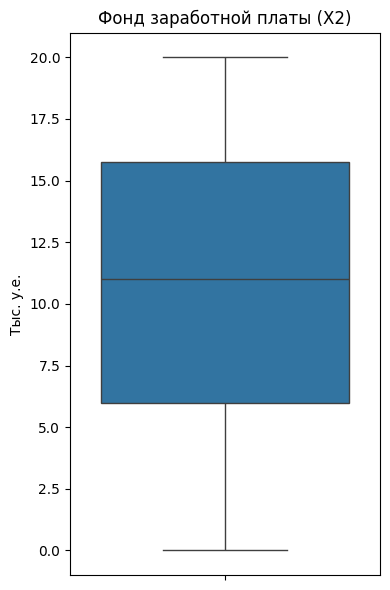

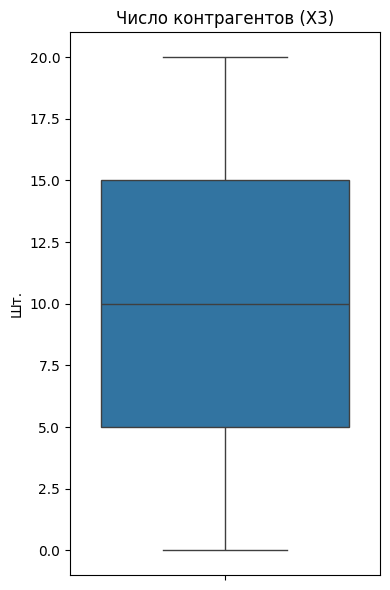

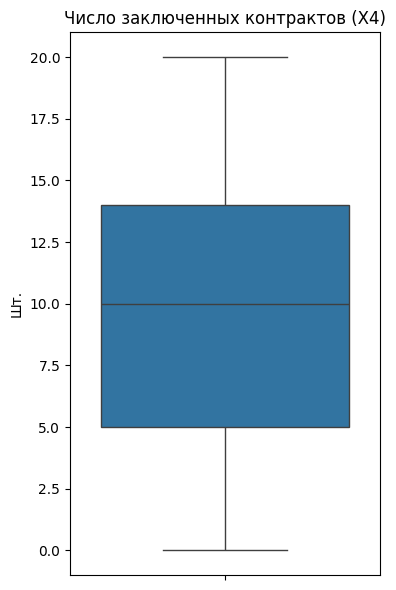

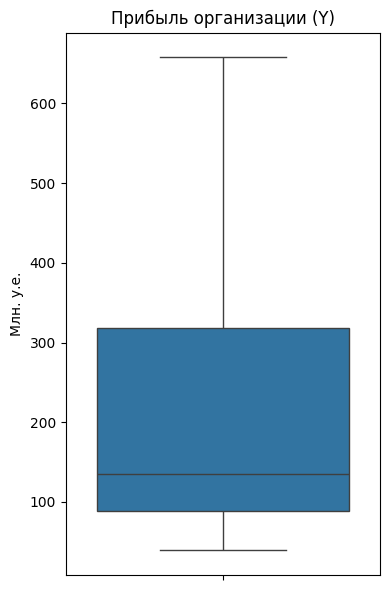

In [3]:
plot_config = {
    'X1': {'title': 'Число работников', 'ylabel': 'Шт.'},
    'X2': {'title': 'Фонд заработной платы', 'ylabel': 'Тыс. у.е.'},
    'X3': {'title': 'Число контрагентов', 'ylabel': 'Шт.'},
    'X4': {'title': 'Число заключенных контрактов', 'ylabel': 'Шт.'},
    'Y': {'title': 'Прибыль организации', 'ylabel': 'Млн. у.е.'}
}

for col in plot_config.keys():
    plt.figure(figsize=(4, 6))
    sns.boxplot(data=data[col])
    plt.title(f'{plot_config[col]["title"]} ({col})')
    plt.xticks(rotation=45)
    plt.ylabel(plot_config[col]["ylabel"])
    plt.tight_layout()
    plt.show()
    print("")

# Проверка пустых значений

In [4]:
has_missing = False

for col in columns:
    null_count = data[col].isnull().sum()
    if null_count > 0:
        has_missing = True

print("Количество пропущенных значений: ")
print(data[columns].isnull().sum().to_string())

Количество пропущенных значений: 
X1    0
X2    0
X3    0
X4    0
Y     0


# Проверка данных на случайность

## Метод медианы


Число работников (X1):
Медиана: 10.00
Выше медианы: 69 наблюдений
Ниже медианы: 71 наблюдений
Равно медиане: 10 наблюдений
Число серий (a_оп): 66
Самая длинная серия (b_оп): 8
Критическое число серий (a_кр): 51
Критическая длина серий (b_кр): 17
Вывод: Данные случайны
 


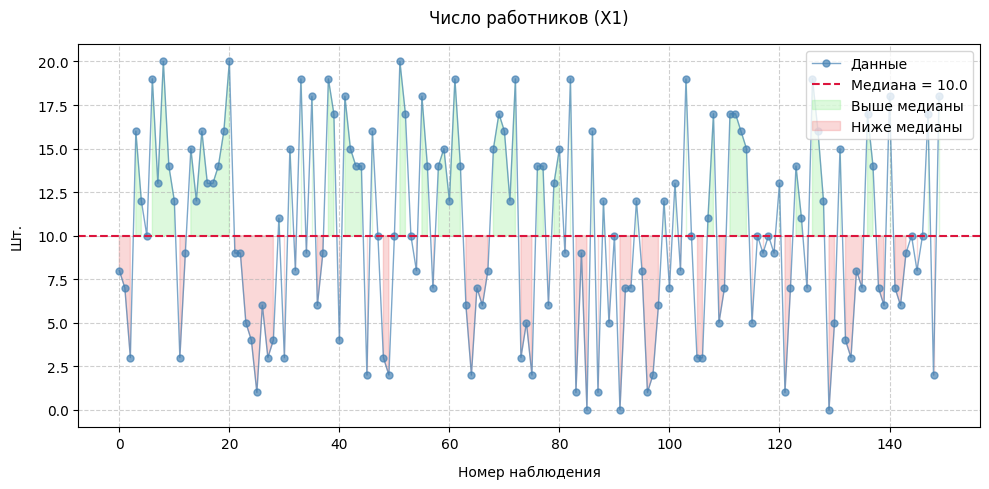


Фонд заработной платы (X2):
Медиана: 11.00
Выше медианы: 70 наблюдений
Ниже медианы: 71 наблюдений
Равно медиане: 9 наблюдений
Число серий (a_оп): 79
Самая длинная серия (b_оп): 8
Критическое число серий (a_кр): 51
Критическая длина серий (b_кр): 17
Вывод: Данные случайны
 


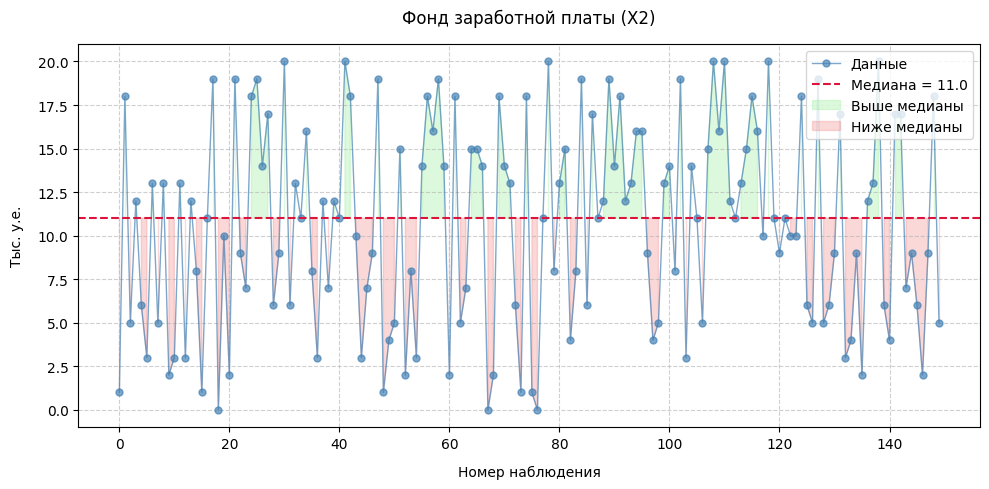


Число контрагентов (X3):
Медиана: 10.00
Выше медианы: 73 наблюдений
Ниже медианы: 70 наблюдений
Равно медиане: 7 наблюдений
Число серий (a_оп): 75
Самая длинная серия (b_оп): 7
Критическое число серий (a_кр): 51
Критическая длина серий (b_кр): 17
Вывод: Данные случайны
 


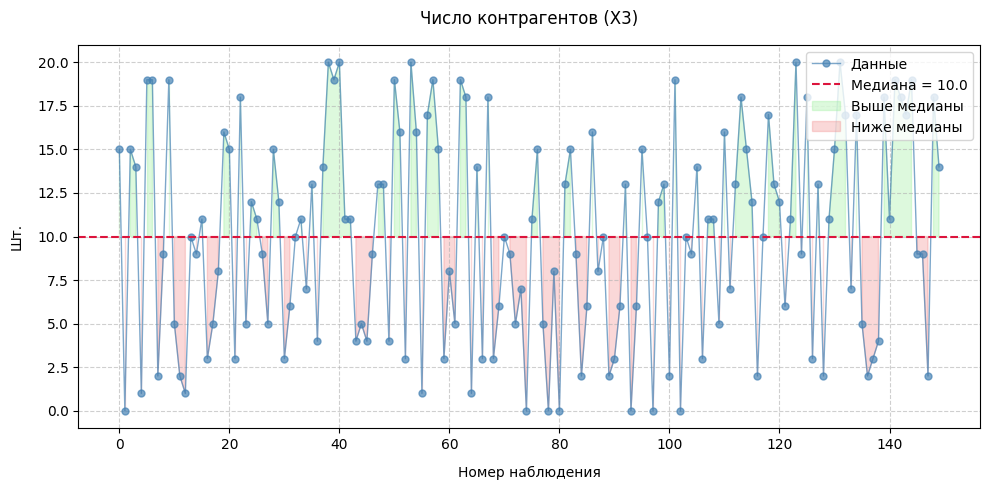


Число заключенных контрактов (X4):
Медиана: 10.00
Выше медианы: 71 наблюдений
Ниже медианы: 68 наблюдений
Равно медиане: 11 наблюдений
Число серий (a_оп): 77
Самая длинная серия (b_оп): 8
Критическое число серий (a_кр): 51
Критическая длина серий (b_кр): 17
Вывод: Данные случайны
 


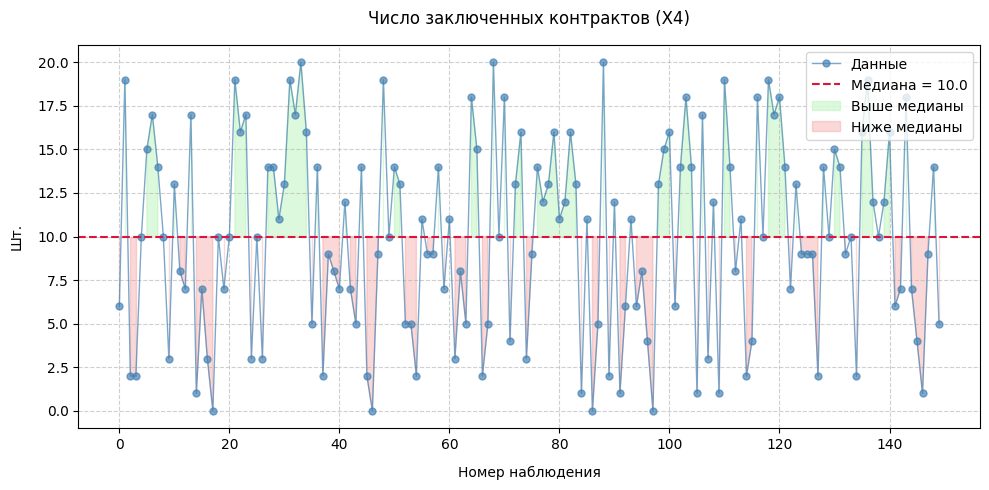


Прибыль организации (Y):
Медиана: 135.50
Выше медианы: 75 наблюдений
Ниже медианы: 75 наблюдений
Равно медиане: 0 наблюдений
Число серий (a_оп): 56
Самая длинная серия (b_оп): 10
Критическое число серий (a_кр): 51
Критическая длина серий (b_кр): 17
Вывод: Данные случайны
 


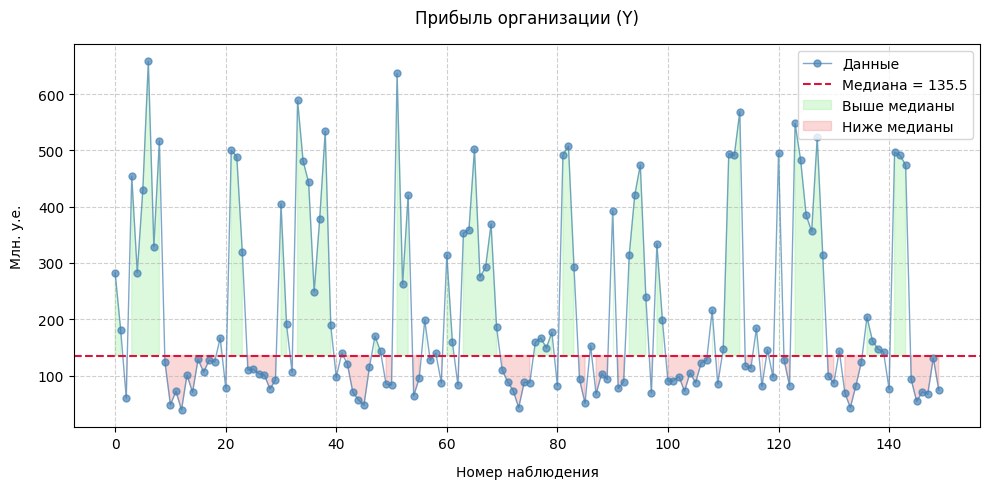

In [5]:
def check_randomness(series):
    median = np.median(series)

    signs = ['+' if x > median else '-' for x in series]

    # количество серий
    a_obs = 1
    for i in range(1, len(signs)):
        if signs[i] != signs[i-1]:
            a_obs += 1

    # длина самой длинной серии
    b_obs = 1
    current_length = 1
    for i in range(1, len(signs)):
        if signs[i] == signs[i-1]:
            current_length += 1
            if current_length > b_obs:
                b_obs = current_length
        else:
            current_length = 1

    # критические значения
    n = len(series)
    a_crit = math.floor(0.5 * (n + 1) - 1.96 * math.sqrt(n - 1))
    b_crit = math.floor(3.3 * math.log(n) + 1)

    # проверяем критерии
    is_random = (a_obs > a_crit) and (b_obs < b_crit)

    return {
        'Медиана': median,
        'Число серий (a_оп)': a_obs,
        'Самая длинная серия (b_оп)': b_obs,
        'Критическое число серий (a_кр)': a_crit,
        'Критическая длина серий (b_кр)': b_crit,
        'Случайность': is_random,
        'Выше медианы': len(series[series > median]),
        'Ниже медианы': len(series[series < median]),
        'Равно медиане': len(series[series == median])
    }


for col in columns:
    res = check_randomness(data[col])

    print(f"\n{plot_config[col]['title']} ({col}):")
    print(f"Медиана: {res['Медиана']:.2f}")
    print(f"Выше медианы: {res['Выше медианы']} наблюдений")
    print(f"Ниже медианы: {res['Ниже медианы']} наблюдений")
    print(f"Равно медиане: {res['Равно медиане']} наблюдений")
    print(f"Число серий (a_оп): {res['Число серий (a_оп)']}")
    print(f"Самая длинная серия (b_оп): {res['Самая длинная серия (b_оп)']}")
    print(f"Критическое число серий (a_кр): {res['Критическое число серий (a_кр)']}")
    print(f"Критическая длина серий (b_кр): {res['Критическая длина серий (b_кр)']}")
    print(f"Вывод: {'Данные случайны' if res['Случайность'] else 'Данные НЕ случайны'}")
    print(" ")

    fig, ax = plt.subplots(figsize=(10, 5))

    ax.plot(data[col], 'o-', color='steelblue', alpha=0.7,
            markersize=5, linewidth=1, label='Данные')

    ax.axhline(res['Медиана'], color='crimson', linestyle='--',
               linewidth=1.5, label=f'Медиана = {res["Медиана"]:.1f}')

    ax.fill_between(range(len(data)), res['Медиана'], data[col],
                    where=(data[col] > res['Медиана']),
                    color='lightgreen', alpha=0.3, label='Выше медианы')
    ax.fill_between(range(len(data)), res['Медиана'], data[col],
                    where=(data[col] < res['Медиана']),
                    color='lightcoral', alpha=0.3, label='Ниже медианы')

    ax.set_title(f'{plot_config[col]["title"]} ({col})', pad=15)
    ax.set_xlabel('Номер наблюдения', labelpad=10)
    ax.set_ylabel(plot_config[col]["ylabel"], labelpad=10)
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.legend(loc='upper right', bbox_to_anchor=(1, 1))

    plt.tight_layout()
    plt.show()